[My GitHub](https://github.com/Joba19/DSCI-235-Project)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

Main Topic:  
My main goal of the project is to show how working from home can affect workers and the overall business. I want to show alll the possible advantages and disavanges of this type of work and the possible factors that popularized and changed the indrustry. I am using the datasets [U.S. Bureau of Labor Statistics](https://www.bls.gov/opub/ted/2023/about-1-in-3-workers-in-management-professional-and-related-occupations-teleworked-november-2023.htm) and [WFH Research](https://wfhresearch.com/) to help visualize and understand telework and working from home.

The Project Timeline:  
  
Week 1 - 2: Download, Clean, and Preprocess the data from the datasets. While fixing any missing data I can find.  

Week 3 - 4: Explore and analyze cleaned data to begin understanding/preprocessing the answers to my objective.  

Week 5 - 6: Write Notes on my finding / preparation to display what the data reads. 

Week 7 - 8: Build visual ways to display the evidence and properly analyze it. (For example charts, survey outcomes, timelines, correlations, etc.)  

Week 9 - 10: Write the final version of my study hopefully having an outcome with strong evidence pointing to it.  
  
  If you Curoius Here are my [Project proposal](https://raw.githubusercontent.com/Joba19/DSCI-235-Project/main/Project_Checkpoints/Project_Checkpoint_1.pdf) and both my [Checkpoint 1]() and [Checkpoint 2]. Hopefully this helps visualize my overall progress in developing this project.

This code below is the setup and cleaning of the [U.S. Bureau of Labor Statistics](https://www.bls.gov/opub/ted/2023/about-1-in-3-workers-in-management-professional-and-related-occupations-teleworked-november-2023.htm) and [WFH Research](https://wfhresearch.com/) datasets. We will use these to help answer the  Main topic and the following below questions:
  
- What's the average age for people working from home?
- What Industry is the most remote?
- what percentage of people are working from home vs in person?
- What's the average Education Level of teleworkers?
- How many hours on average do a Teleworker working full time clock in compared to an in person worker?
- How has COVID affected Working from home?  
  
This code is the setup and cleaning of the [U.S. Bureau of Labor Statistics](https://www.bls.gov/opub/ted/2023/about-1-in-3-workers-in-management-professional-and-related-occupations-teleworked-november-2023.htm) dataset:

In [68]:
file_path = "https://raw.githubusercontent.com/Joba19/DSCI-235-Project/main/DataSets/telework-tables-2023-11(V2).csv"

df = pd.read_csv(file_path, skiprows=5)

# Rename the Columns
df.columns = ["Characteristic", "Total at work", "Telework Total", "Telework Some","Telework All", "No Telework", "Pct Total at work", "Pct Telework Total","Pct Telework Some", "Pct Telework All", "Pct No Telework"]

# Cleans the data
df.dropna(subset=["Characteristic"], inplace=True)
df.reset_index(drop=True, inplace=True)

# Cleans then converts The Telework Total column
df["Telework Total"] = (
    df["Telework Total"]
    .str.strip()  # Removes the annoying whitespaces
    .str.replace(",", "", regex=True)  # Removes the commas
    .replace("", "0")  # Handles those random empty strings
    .fillna("0")  # Handles the NaN Problem (unfortanate)
    .astype(int)  # Converts the numbers to an integer
)

# Strips the whitespace from Characteristic
df["Characteristic"] = df["Characteristic"].str.strip()

# Display cleaned data
df.head(10)

,Characteristic,Total at work,Telework Total,Telework Some,Telework All,No Telework,Pct Total at work,Pct Telework Total,Pct Telework Some,Pct Telework All,Pct No Telework
0,"Total, 16 years and over","157,753",32326,"16,479","15,847","125,427",100.0,20.5,10.4,10.0,79.5
1,16 to 24 years,"19,857",1190,576,614,"18,666",100.0,6.0,2.9,3.1,94.0
2,16 to 19 years,"5,366",84,17,67,"5,281",100.0,1.6,0.3,1.3,98.4
3,20 to 24 years,"14,491",1106,559,547,"13,385",100.0,7.6,3.9,3.8,92.4
4,25 to 54 years,"101,297",23283,"12,214","11,069","78,014",100.0,23.0,12.1,10.9,77.0
5,25 to 34 years,"34,904",7308,"3,843","3,465","27,596",100.0,20.9,11.0,9.9,79.1
6,35 to 44 years,"34,926",8586,"4,466","4,120","26,340",100.0,24.6,12.8,11.8,75.4
7,45 to 54 years,"31,467",7389,"3,905","3,484","24,078",100.0,23.5,12.4,11.1,76.5
8,55 years and over,"36,598",7852,"3,689","4,164","28,746",100.0,21.5,10.1,11.4,78.5
9,55 to 64 years,"25,912",5377,"2,668","2,709","20,535",100.0,20.8,10.3,10.5,79.2


and this code is the setup and cleaning the [WFH Research](https://wfhresearch.com/) dataset:

In [71]:
file_path = "https://raw.githubusercontent.com/Joba19/DSCI-235-Project/main/DataSets/WFHtimeseries_monthly_(Indrustry).csv"

df = pd.read_csv(file_path)

df.columns = ["Date","Entertainment","Education","Insurance","Government","Healthcare","Hospitaility \\ Food","Information","Manufacturing","Bus Services","Realestate","Retail","Transport \\ Warehousing","Utilities","Wholesale","License","Citations"]

df.head()

,Date,Entertainment,Education,Insurance,Government,Healthcare,Hospitaility \ Food,Information,Manufacturing,Bus Services,Realestate,Retail,Transport \ Warehousing,Utilities,Wholesale,License,Citations
0,1/1/2022,34.8,24.4,44.8,26.9,26.0,11.8,48.42,17.42,40.46,35.48,15.00,13.17,28.22,37.37,"Copyright 2025 by Jose Maria Barrero, Nicholas...","When using this work, please cite: Barrero, J..."
1,1/1/2023,35.9,21.8,43.1,24.1,25.2,11.2,45.28,16.13,39.19,26.16,13.98,13.31,28.17,26.57,NaN,NaN
2,1/1/2024,32.5,19.5,45.0,26.8,25.7,10.3,44.70,16.16,38.99,33.68,13.47,13.26,31.49,30.14,NaN,NaN


The first research question I will tackle will be using the [U.S. Bureau of Labor Statistics](https://www.bls.gov/opub/ted/2023/about-1-in-3-workers-in-management-professional-and-related-occupations-teleworked-november-2023.htm) dataset.  
- How common is Telework/Working from home in America in the modern day?  
  
While this data is from November 2023, It is the most recent data I could pull from the [U.S. Bureau of Labor Statistics](https://www.bls.gov/opub/ted/2023/about-1-in-3-workers-in-management-professional-and-related-occupations-teleworked-november-2023.htm) dataset. This data also covers all indrustiries making the below output no too surprising.

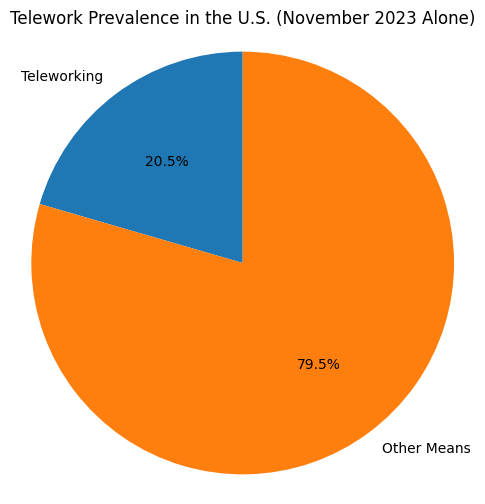

In [ ]:
# Filters The Row "Total, 16 years and over"
total_row = df[df["Characteristic"].str.contains("Total, 16 years and over", na=False)].iloc[0]

# Gets Telework and No Telework Values
telework_pct = total_row["Pct Telework Total"]
no_telework_pct = total_row["Pct No Telework"]

# Labels and Values For The Pie Chart
labels = ["Teleworking", "Other Means"]
values = [telework_pct, no_telework_pct]

# Creates The Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Telework/Working from home Prevalence in the U.S. (November 2023 Alone)")
plt.axis('equal')
plt.show()

The above pie chart made me question what Industry is the most remote? So using the [WFH Research](https://wfhresearch.com/) dataset I made a Graph show that the Insureance and Information (Example: News) Industries has the most teleworker/Workers from home.

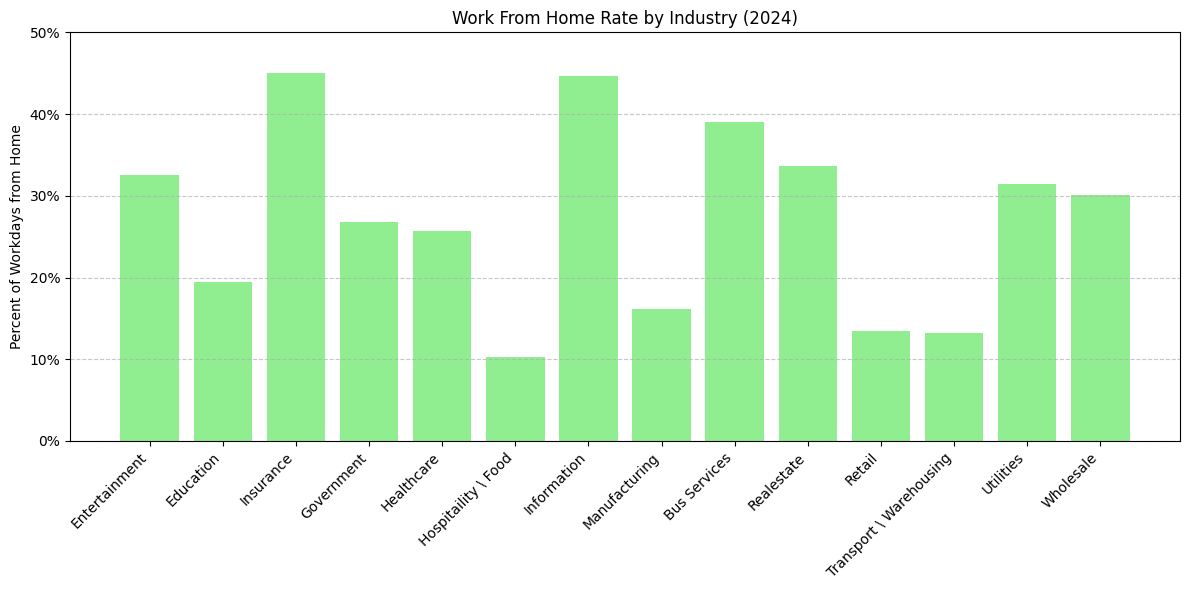

In [74]:
df["Date"] = pd.to_datetime(df["Date"])

latest = df.iloc[-1][1:15]  # Removes 'Date', 'License', 'Citations'

# Creates the Plot
plt.figure(figsize=(12, 6))
plt.bar(latest.index, latest.values, color='lightgreen')
plt.title("Work From Home Rate by Industry (2024)")
plt.ylabel("Percent of Workdays from Home")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(latest.values) + 5)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.0f}%"))
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This bar chart shows the Most prevoent teleworkers biased on the age range

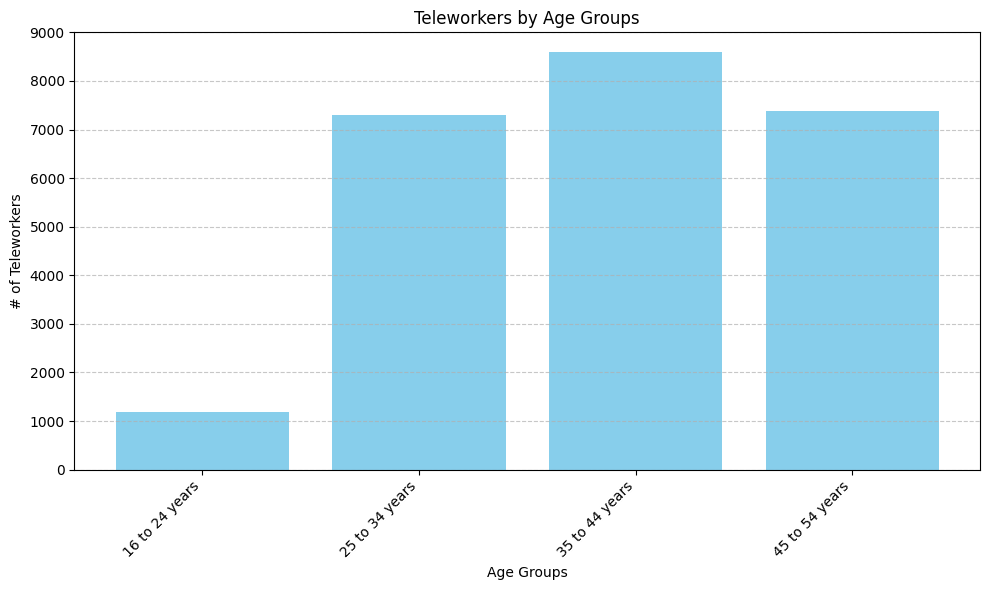

In [70]:
# Filter for first 8 rows
filtered_df = df.iloc[0:8].copy()

# Remove specific rows by value in the "Characteristic" column
exclude = ["Total, 16 years and over", "25 to 54 years", "16 to 19 years", "20 to 24 years"]
filtered_df = filtered_df[~filtered_df["Characteristic"].isin(exclude)]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(filtered_df["Characteristic"], filtered_df["Telework Total"], color='skyblue')

# Format
plt.title("Teleworkers by Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("# of Teleworkers")
plt.xticks(rotation=45, ha='right')

# Format y-axis
plt.yscale('linear')
plt.ylim(0, 9000)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.gca().yaxis.set_major_locator(MultipleLocator(1000))

# Display
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This graph shows the most common age groups for people working from home. The most prevolent teleworkers range from 35 to 44 years old.